# Uczenie maszynowe w analizie szeregów czasowych

## Setup

In [165]:
import numpy as np # algebra
import pandas as pd # data processing, zarządzanie plikami, ramki danych


import matplotlib as mpl
import matplotlib.pyplot as plt   # wizualizacja danych
#import seaborn as sns             # wizualizacja danych
import matplotlib.dates as mdates # wizualizacja danych - dat

# Wybór danych

Wybrane szeregi czasowe to dane pobierane miesięcznie od 2014.01.01 do 2024.01.01.


# Szereg stacjonarny
1-Month Real Interest Rate

https://fred.stlouisfed.org/series/REAINTRATREARAT1MO

In [166]:
data_rate = pd.read_csv("D:\inz\data\interest_rate.csv", sep=',', encoding='utf-8', index_col = 'DATE', parse_dates = True) # upewnienie się, że daty będą rozpoznawane jako daty
df_rate = pd.DataFrame(data_rate)
df_rate.columns.values[0] = 'REAL_INTEREST_RATE'
df_rate.index.freq = 'MS' # zaznaczam, że dane sa miesięczne (zazwyczaj powinno się i tak ustawić automatycznie)
print(df_rate.head(10))


            REAL_INTEREST_RATE
DATE                          
2014-01-01           -1.547831
2014-02-01           -1.563561
2014-03-01           -0.425359
2014-04-01           -1.576272
2014-05-01           -1.945522
2014-06-01           -1.248905
2014-07-01           -2.327665
2014-08-01           -1.696280
2014-09-01           -2.775060
2014-10-01           -1.153638


In [167]:
df_rate['DATE'] = pd.to_datetime(df_rate['DATE'])

plt.figure(figsize=(12, 6))  # Ustawienie rozmiaru wykresu
plt.plot(df_rate['DATE'], df_rate['REAL_INTEREST_RATE'], label='Rzeczywista stopa procentowa', color='blue')
plt.title('1-miesięczna rzeczywista stopa procentowa')
plt.xlabel('Data')
plt.ylabel('Poziom rzeczywistej stopy procentowej')

# Ustawienie wyświetlania daty
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tick co rok
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tylko roku

# Pochylenie napisów na osi X
plt.xticks(rotation=45)  # Pochylenie napisów o 45 stopni

plt.axhline(0, color='grey', lw=0.5, ls='--')  # Linia odniesienia na poziomie 0
plt.grid()
plt.legend()
plt.tight_layout()  # Dopasowanie układu do wykresu
plt.show()


KeyError: 'DATE'

# Szereg z trendem
Consumer Price Index for All Urban Consumers: All Items in U.S. City Average

https://fred.stlouisfed.org/series/CPIAUCSL

In [168]:
data_cpi = pd.read_csv("D:\inz\data/cpi.csv", sep=',', encoding='utf-8', index_col = 'DATE', parse_dates = True) # upewnienie się, że daty będą rozpoznawane jako daty
df_cpi = pd.DataFrame(data_cpi)
df_cpi.columns.values[0] = 'REAL_INTEREST_RATE'
df_cpi.index.freq = 'MS' # zaznaczam, że dane sa miesięczne
print(df_cpi.head(10))

            REAL_INTEREST_RATE
DATE                          
2014-01-01             235.288
2014-02-01             235.547
2014-03-01             236.028
2014-04-01             236.468
2014-05-01             236.918
2014-06-01             237.231
2014-07-01             237.498
2014-08-01             237.460
2014-09-01             237.477
2014-10-01             237.430


In [169]:
df_rate['DATE'] = pd.to_datetime(df_rate['DATE'])

plt.figure(figsize=(12, 6))  # Ustawienie rozmiaru wykresu
plt.plot(df_cpi['DATE'], df_cpi['CPI'], label='Wskaźnik CPI', color='blue')
plt.title('Wskaźnik CPI dla wszystkich konsumentów miejskich: wszystkie towary w średniej dla miast w USA')
plt.xlabel('Data')
plt.ylabel('Poziom CPI')

# Ustawienie wyświetlania daty
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tick co rok
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tylko roku

# Pochylenie napisów na osi X
plt.xticks(rotation=45)  # Pochylenie napisów o 45 stopni

plt.grid()
plt.legend()
plt.tight_layout()  # Dopasowanie układu do wykresu
plt.show()

KeyError: 'DATE'

# Szereg  z sezonowością
Retail Sales: Building Materials and Garden Equipment and Supplies Dealers

https://fred.stlouisfed.org/series/MRTSSM444USN

In [170]:
data_materials = pd.read_csv("D:\inz\data\materials.csv", sep=',', encoding='utf-8', index_col = 'DATE', parse_dates = True) # upewnienie się, że daty będą rozpoznawane jako daty
df_materials = pd.DataFrame(data_materials)
df_materials.columns.values[0] = 'MAT' # kolumna jest interpretowana jako pierwsza kolumna w Data Frame
df_materials.index.freq = 'MS' # zaznaczam, że dane sa miesięczne
print(df_materials.head(10))

                MAT
DATE               
2014-01-01  19688.0
2014-02-01  18801.0
2014-03-01  24103.0
2014-04-01  30137.0
2014-05-01  33416.0
2014-06-01  30072.0
2014-07-01  28642.0
2014-08-01  26446.0
2014-09-01  26195.0
2014-10-01  27329.0


In [171]:
df_materials['DATE'] = pd.to_datetime(df_rate['DATE'])

plt.figure(figsize=(12, 6))  # Ustawienie rozmiaru wykresu
plt.plot(df_materials['DATE'], df_materials['MAT'], label='Wskaźnik sprzedaży', color='blue')
plt.title('Sprzedaż detaliczna: sprzedaż detaliczna materiałów budowlanych oraz sprzętu i artykułów ogrodniczych')
plt.xlabel('Data')
plt.ylabel('Poziom sprzedaży')

# Ustawienie wyświetlania daty
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tick co rok
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tylko roku

# Pochylenie napisów na osi X
plt.xticks(rotation=45)  # Pochylenie napisów o 45 stopni

plt.grid()
plt.legend()
plt.tight_layout()  # Dopasowanie układu do wykresu
plt.show()

KeyError: 'DATE'

# LSTM

Ładujemy bibliotekę do modelu LSTM

In [172]:
from statsmodels.tsa.seasonal import seasonal_decompose

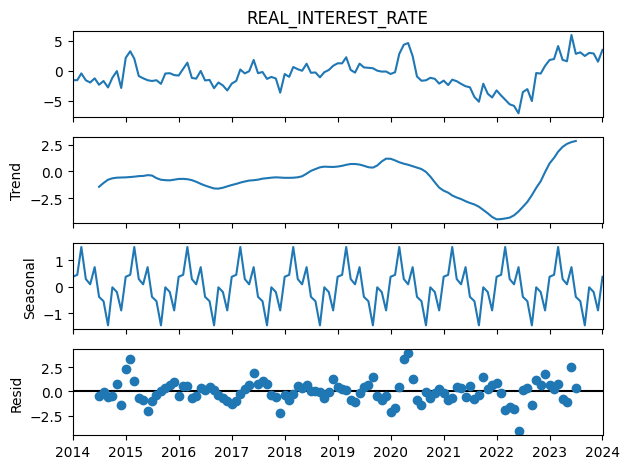

In [173]:
results = seasonal_decompose(df_rate['REAL_INTEREST_RATE'])
results.plot(); #; - wykresy nie pojawiają się podwójnie!

Dane do LSTM (ogólnie RNN) nie potrzebują badania stacjonarności szeregu, mogą one działać na danych niestacjonarnych. Do metod klasycznych o tym nie zapomnieć!!!!
PS. Jeśli model nie daje dobrych rezultatów, po (stacjonaryzacji/ustacjonorowaniu) danych może dać lepsze wyniki. Łatwiej wtedy modelowi nauczyć się paternu.
Sprawdzamy długośc szeregu i go dzielimy.

In [174]:
print(len(df_rate), len(df_rate)/4, len(df_rate)-24)

121 30.25 97


Zgadza się że pomiędzy 2014-01, a 2024-01 powinno być tyle miesięcy (10 lat plus miesiąc). Podzielimy dane na część testową i treningową. Do początku roku 2023 dane treningowe, pozostałe dane testowe.

In [175]:

train_rate = df_rate[:96]
test_rate = df_rate[96:]

Konwertujemy dane do skali (0, 1)

In [176]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [177]:
print(df_rate.head(), df_rate.tail())

            REAL_INTEREST_RATE
DATE                          
2014-01-01           -1.547831
2014-02-01           -1.563561
2014-03-01           -0.425359
2014-04-01           -1.576272
2014-05-01           -1.945522             REAL_INTEREST_RATE
DATE                          
2023-09-01            2.492336
2023-10-01            3.005341
2023-11-01            2.907568
2023-12-01            1.538694
2024-01-01            3.511612


In [178]:
scaler.fit(train_rate)
scaled_train_rate = scaler.transform(train_rate)
scaled_test_rate = scaler.transform(test_rate)

In [179]:
scaled_train_rate

array([[0.36789334],
       [0.36629144],
       [0.48220301],
       [0.36499705],
       [0.32739352],
       [0.39833529],
       [0.28847711],
       [0.3527757 ],
       [0.24291551],
       [0.40803698],
       [0.52150835],
       [0.23373715],
       [0.74678252],
       [0.85937209],
       [0.73394124],
       [0.4373709 ],
       [0.39930074],
       [0.366115  ],
       [0.35303576],
       [0.36571407],
       [0.30400748],
       [0.48017098],
       [0.48560479],
       [0.45375731],
       [0.44584697],
       [0.55980388],
       [0.66506794],
       [0.40528641],
       [0.39298872],
       [0.52406622],
       [0.36274681],
       [0.37137642],
       [0.23026196],
       [0.3271657 ],
       [0.27683208],
       [0.19177385],
       [0.30830964],
       [0.35455028],
       [0.54838294],
       [0.4827225 ],
       [0.51938561],
       [0.71105205],
       [0.48597013],
       [0.50608058],
       [0.38903163],
       [0.42225038],
       [0.39519781],
       [0.153

Tworzymy generator. Ponieważ jest to uczenie nadzorowane, będziemy potrzebować generatora do prawidłowych predykcji. Przykład:
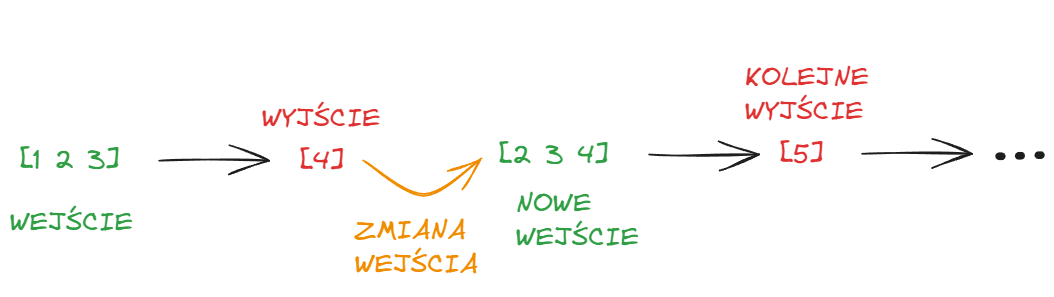
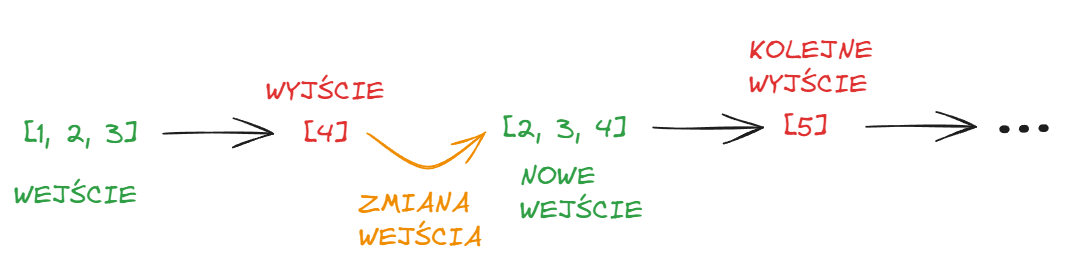

In [180]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator #w starszej wersji keras.preprocessing.sequence wystarczyło

In [181]:
# definuje generator - przykład
n_input = 3 #ilość wejść
n_features = 1 #ilość cech (można ustawić więcej dla szeregów, które miałyby więcej cech (kolumn))
generator = TimeseriesGenerator(scaled_train_rate, scaled_train_rate, length=n_input, batch_size=1)

In [182]:
#wygląd generatora
X, y = generator[0]
print(f'Wektor X (wektor danych wejściowych): \n{X}') #input #flatten() - przedstawia wektor poziomo
print(f'Wyjście y: \n{y}') #output

Wektor X (wektor danych wejściowych): 
[[[0.36789334]
  [0.36629144]
  [0.48220301]]]
Wyjście y: 
[[0.36499705]]


In [183]:
X.shape #(ilość kolumn, ilość wierszy, ilość cech) 

(1, 3, 1)

In [184]:
# generator dla 12 miesięcy
n_input = 12
generator = TimeseriesGenerator(scaled_train_rate, scaled_train_rate, length=n_input, batch_size=1)

# Tworzenie modelu LSTM

In [185]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [186]:
# definiowanie modelu
model = Sequential() #wartstwy dodawane w sekwencji 
model.add(LSTM( 100, activation='relu', input_shape=(n_input, n_features))) # dodajemy warstwe lstm do sieci, 100 neuronów, funkcja aktywacji - ReLu
model.add(Dense(1)) #Dodaje warstwę wyjściową (tylko jeden neuron)
model.compile(optimizer='adam', loss='mse') #konfiguracja modelu przed jego trenowaniem #Adam automatycznie dostosowuje współczynniki nauki (learning rate) dla każdej wagi osobno, na podstawie pierwszego rzędu momentu (średnia) oraz drugiego rzędu momentu (wariancja) gradientów.
# adam działa szybciej niż gradient prosty
model.summary() #budowa modelu


c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [187]:
# zostosuje model do danych (fit model)
model.fit(generator, epochs=50) #liczba epok do sprawdzenia, wstępnie 50

Epoch 1/50


c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1262
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0301
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0279
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0263
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0284
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0207
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0162
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0248
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0244
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0175
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0249
Epoch 13/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0193
Epoch 14/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0174
Epoch 15/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0181
Epoch 16/50
84/84 ━━━━━━━━━━━━

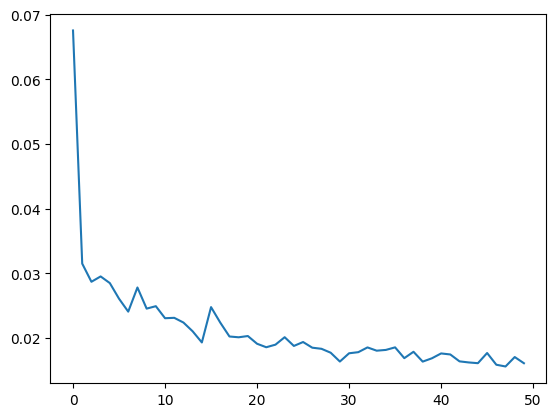

In [188]:
#funkcja straty - badanie efektywności modelu

loss_per_epochs = model.history.history['loss']
plt.plot(range(len(loss_per_epochs)), loss_per_epochs)

Zmiana wektora inputu o jeden miesiąc, było od 1-12 miesięcy, a nowy będzie od 2-13 miesięcy.

In [189]:
last_train_rate_batch = scaled_train_rate[-12:]

In [190]:
#tutaj następuje zmiana wektora o jeden
last_train_rate_batch = last_train_rate_batch.reshape((1, n_input, n_features))

In [191]:
#predykcja dla ostatniej wartości (np: 13-tego miesiąca)
model.predict(last_train_rate_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[0.12997547]], dtype=float32)

In [192]:
scaled_test_rate[0]

array([0.1929886])

In [193]:
test_predictions = []
first_eval_batch = scaled_test_rate[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_rate)):
    current_pred = model.predict(current_batch)[0] # wartość przewidywana dla pierwszej serii
    test_predictions.append(current_pred) # dodaje wartość przewidywaną do serii
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1) #uaktualniam serie i usuwam pierwszą wartość

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [194]:
test_predictions

[array([0.77797484], dtype=float32),
 array([0.73177886], dtype=float32),
 array([0.64122885], dtype=float32),
 array([0.56126803], dtype=float32),
 array([0.5469791], dtype=float32),
 array([0.51104265], dtype=float32),
 array([0.49189425], dtype=float32),
 array([0.47031292], dtype=float32),
 array([0.45604143], dtype=float32),
 array([0.44214514], dtype=float32),
 array([0.41854385], dtype=float32),
 array([0.41932452], dtype=float32),
 array([0.4099596], dtype=float32),
 array([0.40350798], dtype=float32),
 array([0.3936921], dtype=float32),
 array([0.38166803], dtype=float32),
 array([0.3719495], dtype=float32),
 array([0.362146], dtype=float32),
 array([0.35393167], dtype=float32),
 array([0.3465401], dtype=float32),
 array([0.34031457], dtype=float32),
 array([0.33492354], dtype=float32),
 array([0.32941827], dtype=float32),
 array([0.32551497], dtype=float32),
 array([0.32194066], dtype=float32)]

In [195]:
test_rate.head()

,REAL_INTEREST_RATE
DATE,
2022-01-01,-3.265321
2022-02-01,-4.126292
2022-03-01,-4.816444
2022-04-01,-5.598164
2022-05-01,-5.857062


Skaluję dane treningowe spowrotem do skali żródłowej.

In [196]:
true_predictions = scaler.inverse_transform(test_predictions)

In [197]:
test_rate['PREDICTIONS'] = true_predictions

C:\Users\Aldona\AppData\Local\Temp\ipykernel_952\4276456183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rate['PREDICTIONS'] = true_predictions


<Axes: xlabel='DATE'>

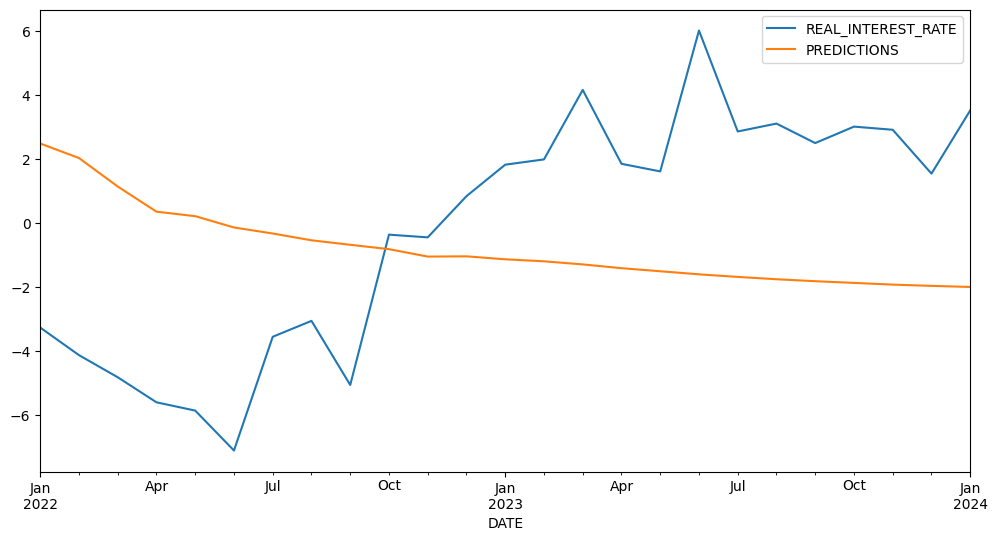

In [198]:
test_rate.plot(figsize=(12,6)) #sprawdzić, czy model przetrenowany, niedotrenowany, dopasować hiperparametry i sprawdzić dla pozostałych szeregów.

Test

In [203]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(test_rate['REAL_INTEREST_RATE'], test_rate['PREDICTIONS'])
rmse

4.673983736114004

W porównaniu do skali danych błąd RMSE wyszedł bardzo duży. Zbadać powód dlaczego. Porównać z innymi szeregami. Ewentualnie dopytać na konsultacjach. Może sprowadzić dane do formy stacjonarnej???